# Some thoughts on the Haynes-Shockly experiment: P7

The [Haynes-Shockly](https://en.wikipedia.org/wiki/Haynes%E2%80%93Shockley_experiment) experiment describes the measurement of the behaviour of minority charge carries in a semiconductor. That all counds rather difficult. But luckily Einstein was able to describe the behavious of those particle using the kinietic theory of gasses and so developed some simple and elegent relatiionshis between the various physicsla parameters that describes their behavious - the [Einstein Relatinships](https://en.wikipedia.org/wiki/Einstein_relation_(kinetic_theory)) and in particular the relationship,
\begin{equation}
D = \frac{\mu k_B T}{q}
\end{equation}
where $k_B$ is Boltzmann's constant, $T$ the absolute temperature of the semiconductor, $q$ the charge of the carrier, other terms are:

- The mobility $\mu$ which is the constant of proportanilty between an applied electric field $E$ and the velocity of the chages $v$ giving $v=E\mu$.
    - You may want to look into why a charge in an accelerating electroc field has a constant speed.
- The lifetime of the charges as they recombine with majority carriers eventually to decay. If there is a probability $k$ per unit time of a single carrier decaying, then we can write that at some time $t$ if there is a time-dependent popualiton $N(t)$ then that populaiotn reduces over s ahrt time $\Delta t$ by an amount $\Delta N = - k N \Delta t$, solving this with some initial condition of the total charge at $t=0$ leads to the concept of a lifetime $\tau$ where the total populaiotn has fallen to $1/e$ of its initial value after a time $\tau$. 
    - You may want to show this.
- The diffusion of the charges. Just like a smell diffusing acrosss a room, so if charges are acting in accordance with the kinetic theory of gasses, so those charges will diffuse away from their initial location. 
    - You may want to conside what causes diffusion and if that underlying process is connected to the mobility. Einstein's relationship strong shows the two are linked - the question is why and how? 

In the Haynes-Shockly experiment we use charges injected into a thin sliver of semiconductor. The charges are then free to move in one direction, but are essentially constrained in the other two directions. Hence there is transport in 1-dimension and there is diffusion only in 1-dimension. Starting from a well defined initial populaiton $P$ of (anything) at a particular location the equaitons of diffusion has been solved many tims to give the 1D space and time dependent relationship
\begin{equation}
P(x,t) = A(t) \exp {\left( -\frac{x^2}{4Dt} \right)}
\end{equation}
where A(t) is a time-dependent normalisation constant. This is nothing more than a normlaised Gaussina function. We can see from the time-dependence of the Gaussian portion that this function spreads out over time.
 - You may want to find a relationship between the full-width-at-hald-max (WFHM) and the term $4Dt$.
So far this doesn't take into account the decay. So once you know what the time dependent decay looks like, let's call it $N(t)$ then we can simply write
\begin{equation}
P(x,t) = N(t) \times A(t) \times \exp {\left( -\frac{x^2}{4Dt} \right)}
\end{equation}

 
Here I'll take some example values from [Haynes and Shockley](https://journals.aps.org/pr/pdf/10.1103/PhysRev.75.691), so $\mu = 1 \times 10^3$ cm$^{2}$V$^{-1}$s$^{-1}$ and $\tau = 10 \ \mu$s. With a sample length of 950 $\mu$m (taken from lab script) and the final contact at a distance of 450 $\mu$m.



In [156]:
import matplotlib.pyplot as plt ### plotting things
import numpy as np ## one of python's main maths packages
import pandas as pd ## for reading in our data
from scipy.optimize import curve_fit ## for fitting a line to our data
import matplotlib.ticker as ticker ## this one lets us change some parameters in our plots.
%matplotlib inline 
%config InlineBackend.figure_format = 'retina' 
from IPython.display import display, Markdown
plt.rcParams.update({'font.size':15})   # A decent font size so the text is readible. 
from IPython.display import display, Markdown
import time as time

In [157]:
# create and array of x positions. taking the injector locaiton at x=0.
x = np.linspace(-550e-6,550e-6,501) # min, max, number of steps
#print(x)


In [165]:
kB = 1.380649e-23
T = 300
c = 1.67e-19

mobility = 1e-1 # must be in SI unit of m^2 V^-1 s^-1
tau = 10e-6

D =  mobility * kB * T / c 

print(D)
t = np.linspace(tau/1000,tau*1.5,502) # an array of times that we'll evaluate, note at t=0 the gaussian is undefinded as we have a 1/0 term.

# Now we want a 2D aray where each column is a different time and each row a different x-posiiton.

P = np.zeros([501,502]) # the numbers match the number of entries for the x and t arrays

# need to populate the P array, so we'll have two for loops, one over the number of times, and one over the number of positions.

for i in range (len(t)):
    for j in range ( len(x)):
        P[j,i] = np.exp(-x[j]**2/(4*D*t[i]))

0.002480207784431138


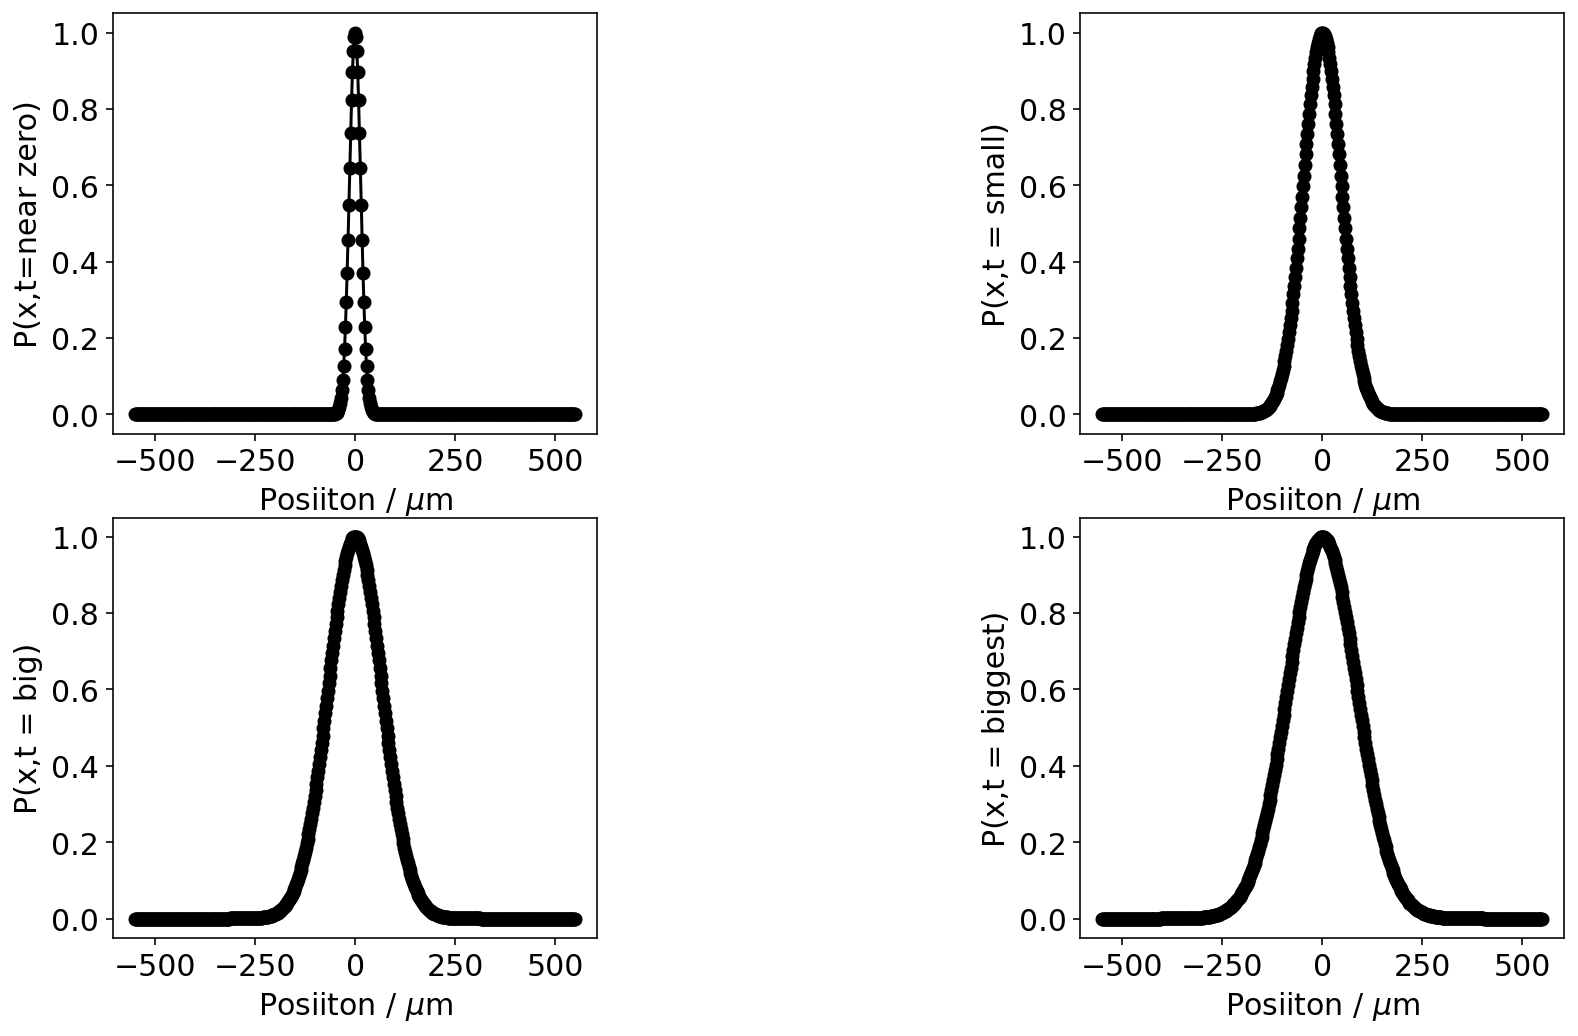

In [166]:
#Let us plot all this to see if this is right and sensible
plt.rcParams['figure.figsize'] = [13, 8.5]
plt.subplots_adjust(wspace=1) #just to a bit of white space between plots.
plt.rcParams.update({'font.size':15}) 


ax1 = plt.subplot(2,2,1) # a 2x2 grid of plots, with this one the 1st plot.
ax1.plot(x/1e-6,P[:,1], 'ok', ls='-')
plt.xlabel('Posiiton / $\mu$m')
plt.ylabel('P(x,t=near zero)')

ax1 = plt.subplot(2,2,2) 
ax1.plot(x/1e-6,P[:,15], 'ok', ls='-')
plt.xlabel('Posiiton / $\mu$m')
plt.ylabel('P(x,t = small)')

ax1 = plt.subplot(2,2,3) 
ax1.plot(x/1e-6,P[:,30], 'ok', ls='-')
plt.xlabel('Posiiton / $\mu$m')
plt.ylabel('P(x,t = big)')

ax1 = plt.subplot(2,2,4) 
ax1.plot(x/1e-6,P[:,50], 'ok', ls='-')
plt.xlabel('Posiiton / $\mu$m')
plt.ylabel('P(x,t = biggest)')

plt.show()

As you can see the plots get fatter, but remain peaked at $x=0$ with a height $P(x,t)=1$ which means the total $P$ in htese plots is increasing as a function of time. You'll need a time-dependent normliazaiton factor to ensure a constant total population. YOu can also see how the FWHM increases with time, do it do what you expect?

another way of viewing this is to plot the array as an image.

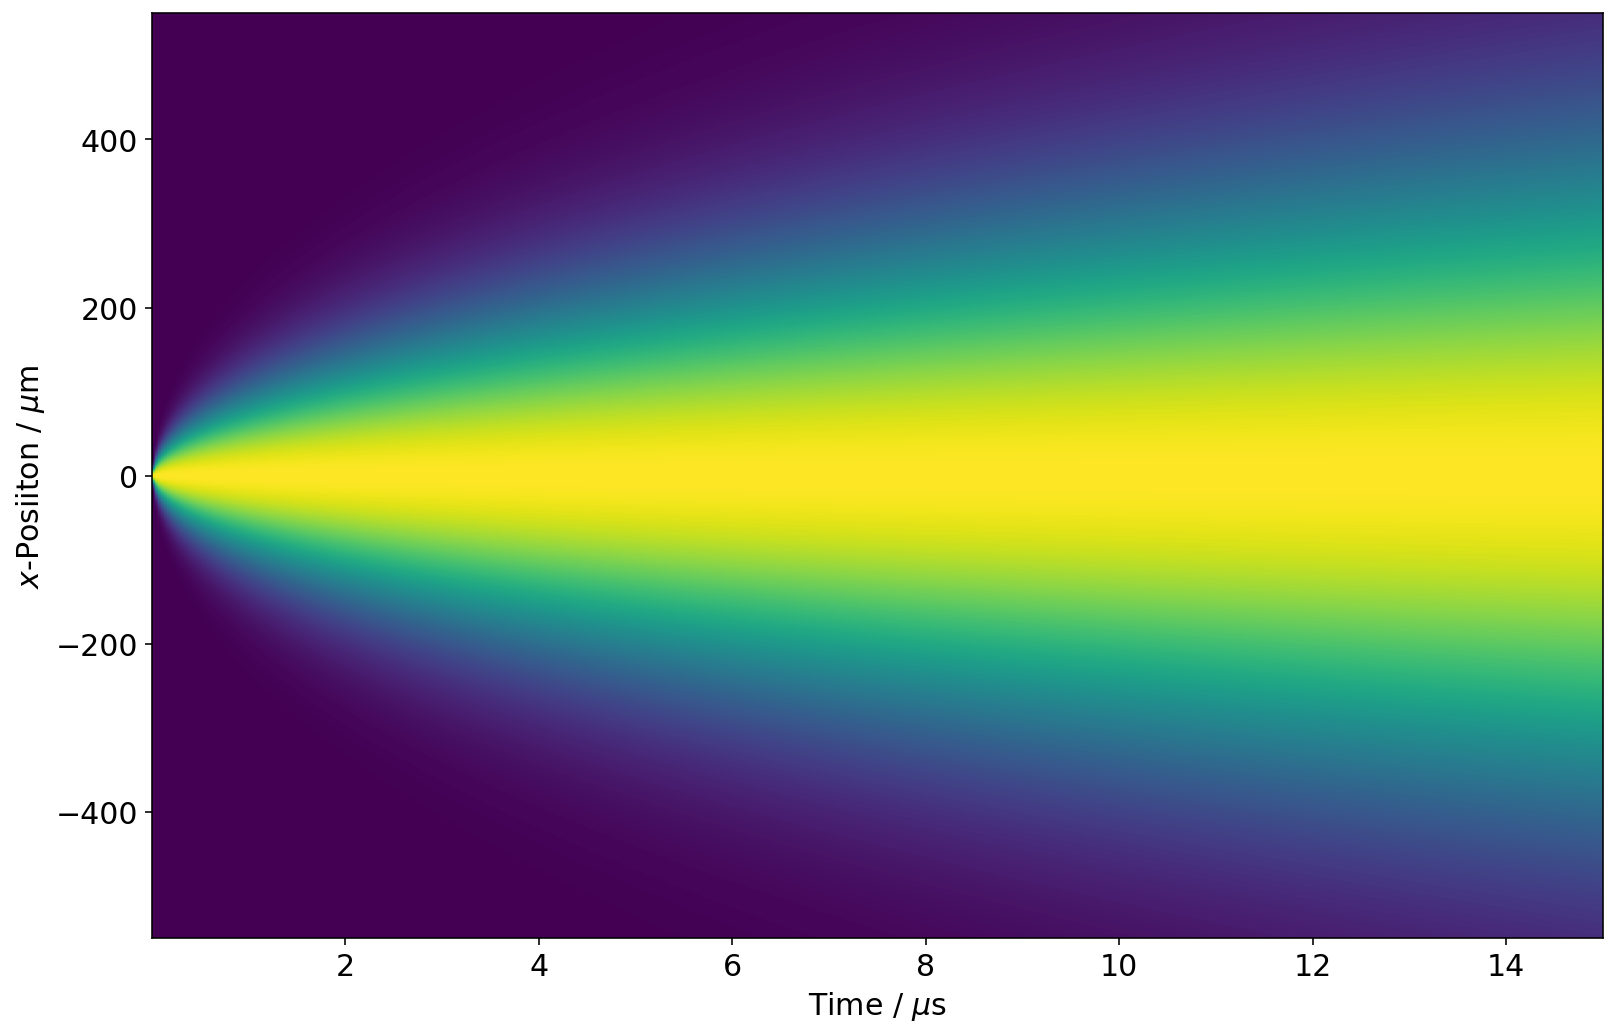

In [167]:
plt.imshow(P,extent=[np.min(t),np.max(t)/1e-6,np.min(x)/1e-6,np.max(x)/1e-6],aspect='auto',origin='lower')
plt.xlabel('Time / $\mu$s')
plt.ylabel('$x$-Posiiton / $\mu$m')
plt.show()

So this describes a stationary Gaussian. We need our model of move its central peak with speed $v$ giving the max $x$-postion of the Gaussina as $x_m = vt$. As the Gaussian is always peaked when the numerator of the exp is zero we need to shift it, so that when $x = x_m$ the numerator of the Gaussin is zero, so we can see that
\begin{equation}
P(x,t) = A(t) \exp {\left( -\frac{(x-vt)^2}{4Dt} \right)}
\end{equation}
fufills this. Again let's have a look:

In [168]:
V = 0.5 # voltage
E = V/ 950e-6 # Efield
v = E * mobility

# need to populate the P array, so we'll have two for loops, one over the number of times, and one over the number of positions.

for i in range (len(t)):
    for j in range ( len(x)):
        P[j,i] = np.exp(-(x[j]-v*t[i])**2/(4*D*t[i]))

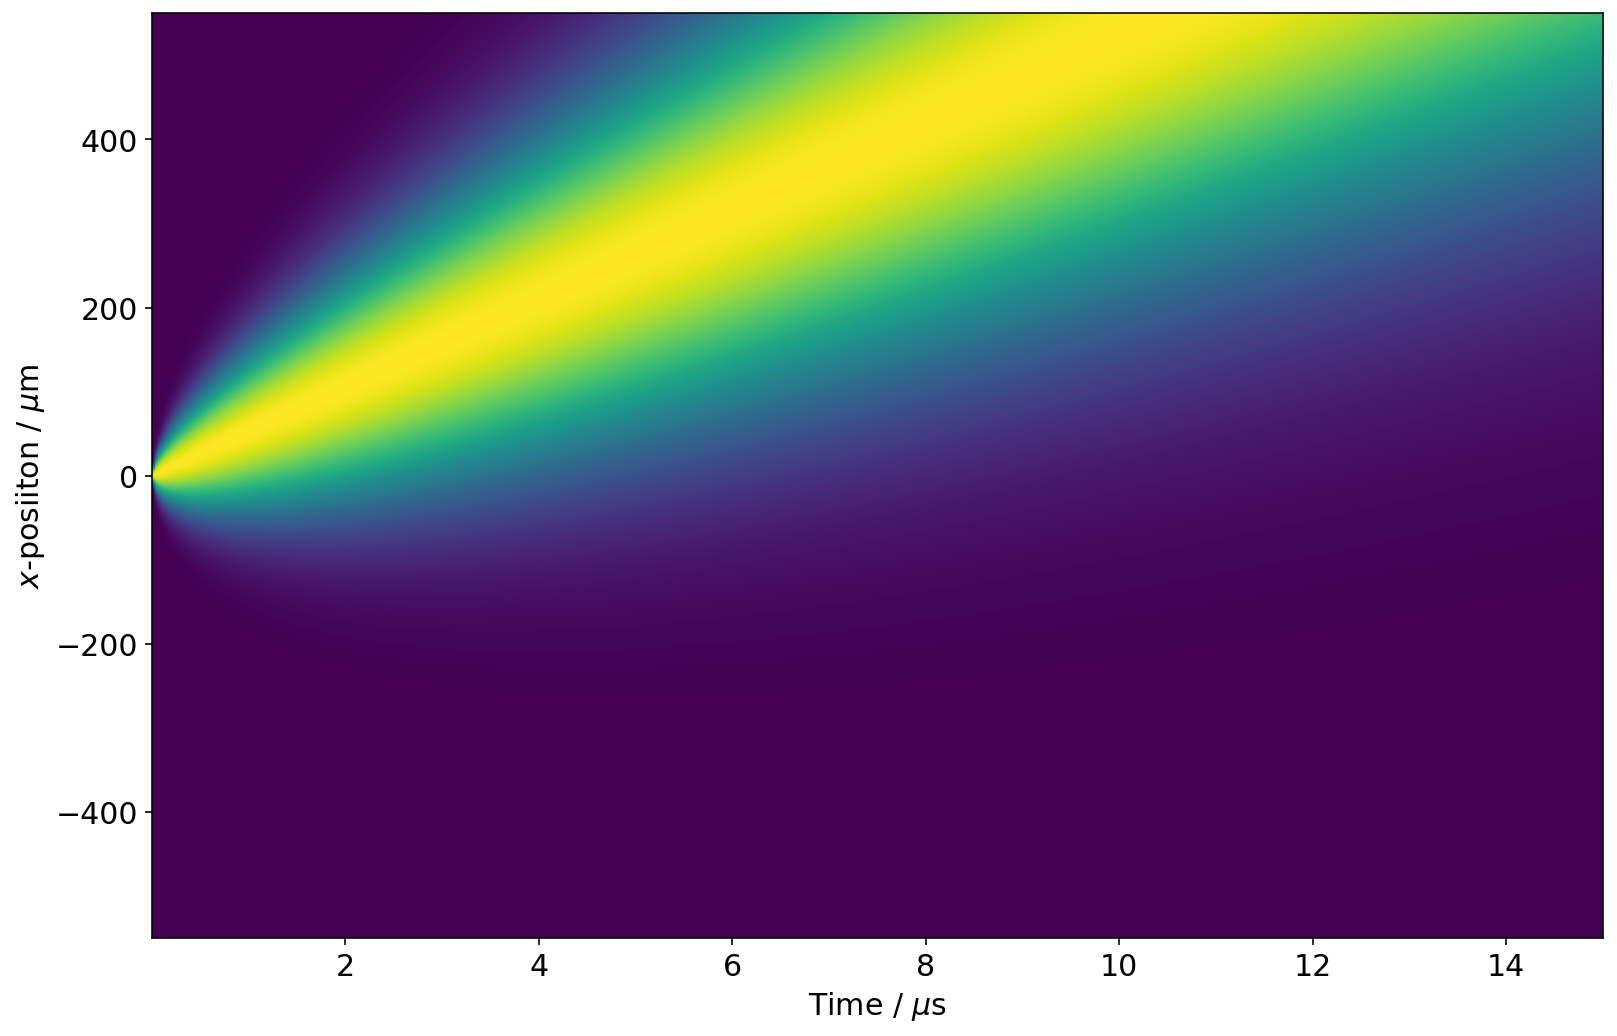

In [169]:
plt.imshow(P,extent=[np.min(t),np.max(t)/1e-6,np.min(x)/1e-6,np.max(x)/1e-6],aspect='auto',origin='lower')
plt.xlabel('Time / $\mu$s')
plt.ylabel('$x$-posiiton / $\mu$m')
plt.show()

This means we can also compute what the various contacts observe. If we assume the the voltage measured is proportional to the number of charges that pass under the collector, this is the same as taking horizontal cut through the above image and plotting the result. We'll need to find the x-posiiton in our array that [most closely matches](https://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array) the position of the contacts - I just stole this code from the www, it seems to work, so I'll just use it.

In [173]:
def find_idx_nearest_val(array, value):
    idx_sorted = np.argsort(array)
    sorted_array = np.array(array[idx_sorted])
    idx = np.searchsorted(sorted_array, value, side="left")
    if idx >= len(array):
        idx_nearest = idx_sorted[len(array)-1]
    elif idx == 0:
        idx_nearest = idx_sorted[0]
    else:
        if abs(value - sorted_array[idx-1]) < abs(value - sorted_array[idx]):
            idx_nearest = idx_sorted[idx-1]
        else:
            idx_nearest = idx_sorted[idx]
    return idx_nearest

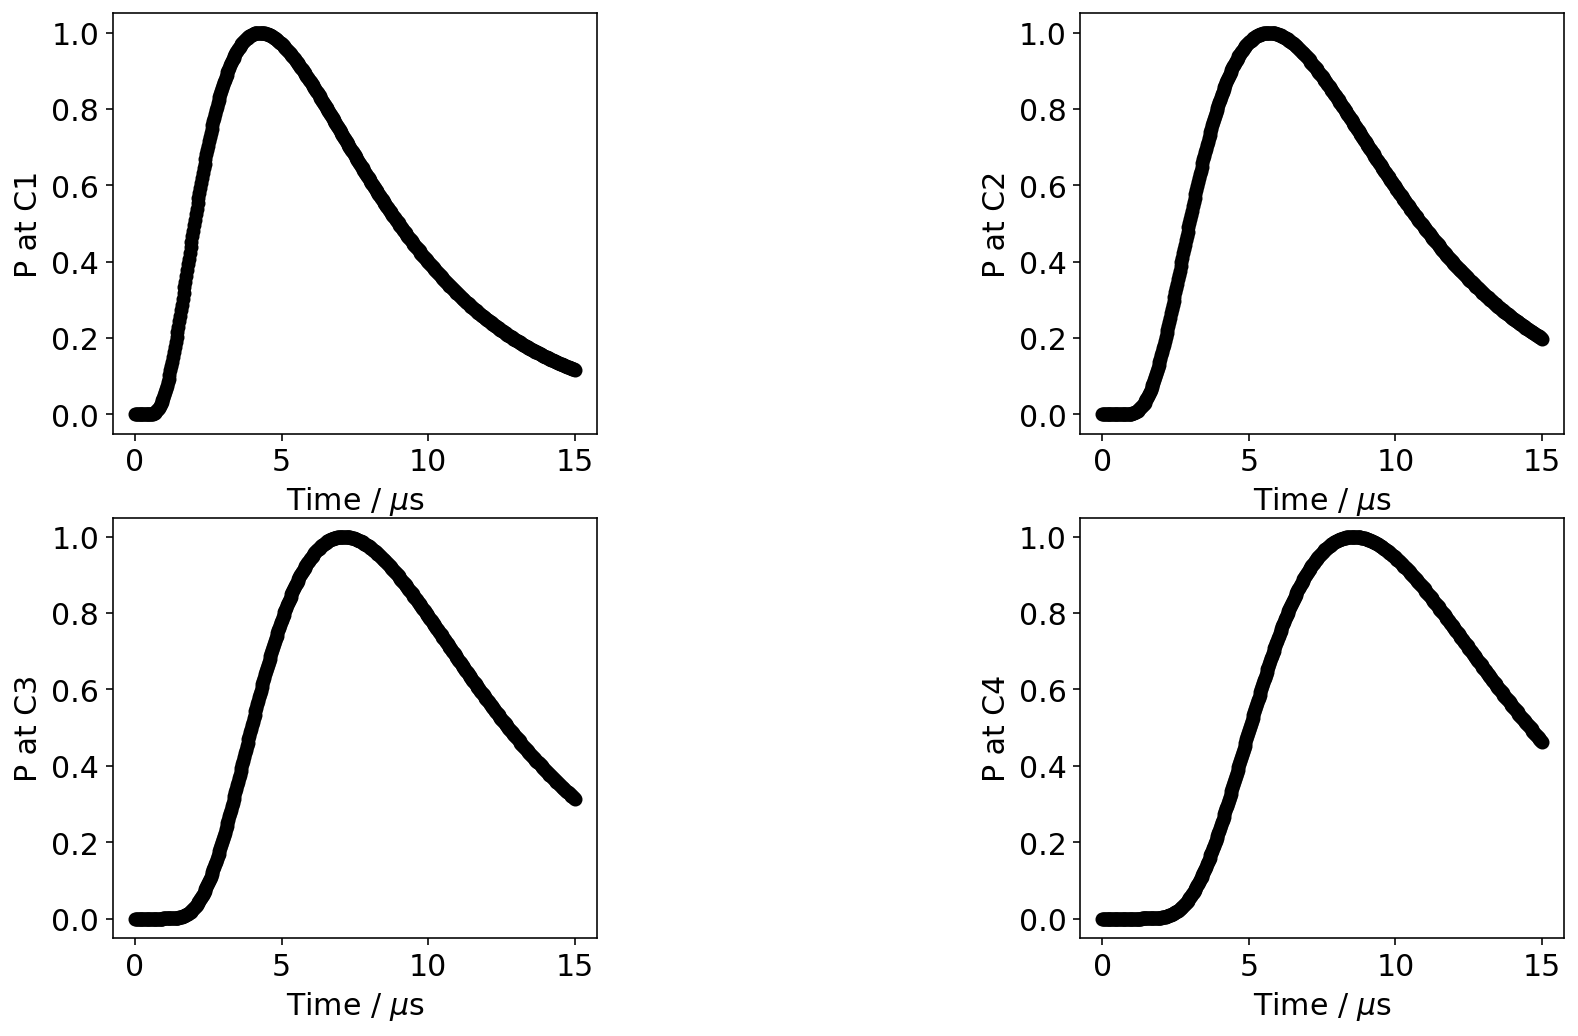

In [174]:
c1 = 225e-6
c2 = c1 + 75e-6
c3 = c2 + 75e-6
c4 = c3 + 75e-6

c1_index = find_idx_nearest_val(x,c1)
c2_index = find_idx_nearest_val(x,c2)
c3_index = find_idx_nearest_val(x,c3)
c4_index = find_idx_nearest_val(x,c4)

#Let us plot all this to see if this is right and sensible
plt.rcParams['figure.figsize'] = [13, 8.5]
plt.subplots_adjust(wspace=1) #just to a bit of white space between plots.
plt.rcParams.update({'font.size':15}) 


ax1 = plt.subplot(2,2,1) # a 2x2 grid of plots, with this one the 1st plot.
ax1.plot(t/1e-6,P[c1_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s')
plt.ylabel('P at C1')

ax1 = plt.subplot(2,2,2) 
ax1.plot(t/1e-6,P[c2_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s')
plt.ylabel('P at C2')

ax1 = plt.subplot(2,2,3) 
ax1.plot(t/1e-6,P[c3_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s')
plt.ylabel('P at C3')

ax1 = plt.subplot(2,2,4) 
ax1.plot(t/1e-6,P[c4_index,:], 'ok', ls='-')
plt.xlabel('Time / $\mu$s')
plt.ylabel('P at C4')

plt.show()

So you can see that each contact picks up a particular shape of signel. Once you have modified the main $P(x,t)$ equation for normilizationa nd decay, you should being to see plots that look like Chris's data, you should be that time have delevoped a nice equation that you can directly fit to Chris's data to extract the three paraemters, $D$, $\tau$ and $\mu$. 

Note in the above example $P$ is really the probabilityer per unit length of finding a partile, but because it's preently not-normalized it has an odd scale to it.